In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
clinic_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/ClinicalData80.csv")
kinz_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/kinzData_panda_2024-05-06_12-24PM.csv")

In [ ]:
clinic_df

,RecordID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,003-RM,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


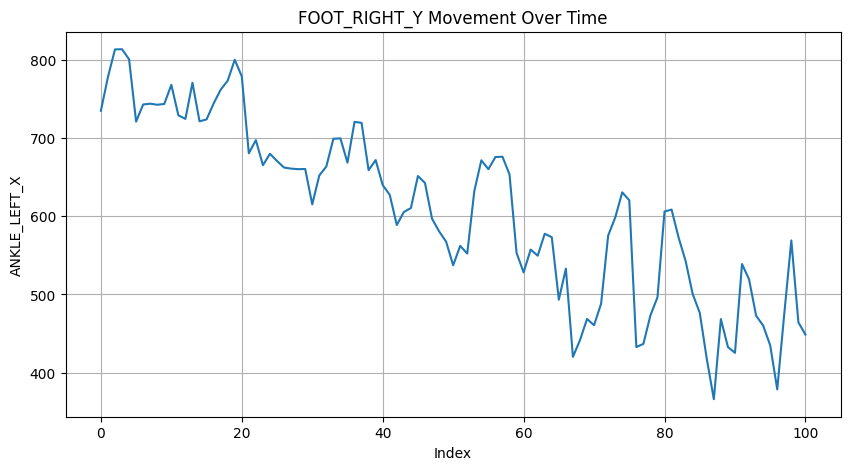

In [ ]:
import matplotlib.pyplot as plt

# Select the data
batch_size = 100
column = "FOOT_RIGHT_Y"

data = kinz_df.loc[:batch_size, column]

# Create the line plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(data.index, data.values, linestyle='-')  # Plot the data
plt.title(column+' Movement Over Time')  # Add a title
plt.xlabel('Index')  # X-axis label
plt.ylabel('ANKLE_LEFT_X')  # Y-axis label
plt.grid(True)  # Add a grid
plt.show()  # Display the plot


In [ ]:
import pandas as pd


columns = kinz_df.columns.tolist()


body_parts = set(part[:-2] for part in columns if part.endswith(('_X', '_Y', '_Z')))
sorted_parts = sorted(body_parts)
new_columns = ['patientID', 'trial_num', 'walking_speed', 'timeStamps']  # Start with these fixed columns
for part in sorted_parts:

    for coord in ['_X', '_Y', '_Z']:
        new_columns.append(part + coord)
kinz_df = kinz_df[new_columns]


In [ ]:
kinz_df

,patientID,trial_num,walking_speed,timeStamps,ANKLE_LEFT_X,ANKLE_LEFT_Y,ANKLE_LEFT_Z,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_Z,...,THUMB_LEFT_Z,THUMB_RIGHT_X,THUMB_RIGHT_Y,THUMB_RIGHT_Z,WRIST_LEFT_X,WRIST_LEFT_Y,WRIST_LEFT_Z,WRIST_RIGHT_X,WRIST_RIGHT_Y,WRIST_RIGHT_Z
0,001-LO,1,Regular,0.000000,390.562805,602.859009,1100.335571,463.011200,632.787964,861.115906,...,1145.996216,564.766174,145.974594,1083.058838,413.098236,-4.848353,1048.260864,591.701233,95.389412,988.159851
1,001-LO,1,Regular,0.031953,450.613678,627.286072,1276.520630,482.768677,654.531128,785.082581,...,1157.933228,592.330017,131.384872,1081.694458,424.203186,53.901688,1039.679077,686.942322,95.910889,1071.759644
2,001-LO,1,Regular,0.064029,431.553619,644.666809,1368.638550,522.916382,679.347290,774.065186,...,1171.173462,639.781372,103.950005,1087.459351,422.456421,73.186546,1057.114258,746.073425,74.025307,1121.079712
3,001-LO,1,Regular,0.239935,461.244110,659.211304,1528.767090,644.572632,682.580811,1240.194946,...,1209.790894,718.639771,154.724213,1271.734253,299.355225,68.522301,1184.870972,770.750427,55.768864,1316.004639
4,001-LO,1,Regular,0.271985,462.041687,661.941528,1535.726196,636.041260,666.786926,1293.354126,...,1285.507080,745.663025,155.708374,1342.324951,269.003235,46.742737,1239.554077,784.686951,50.482513,1371.748047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36978,080-TW,4,Fast,6.672006,0.126880,446.535370,1090.030762,-175.127060,434.097626,1092.649170,...,875.477295,-302.459106,-167.914749,858.258667,195.830185,-223.843414,788.262939,-371.584137,-232.415070,762.661682
36979,080-TW,4,Fast,6.704002,0.966503,431.704987,1087.463257,-165.724731,431.496918,1075.524658,...,856.007202,-308.187500,-176.329666,846.691711,194.798309,-232.748657,755.283325,-375.846252,-229.469437,745.169312
36980,080-TW,4,Fast,6.736022,37.078635,385.959290,1084.058466,-113.419082,393.683144,1083.271381,...,828.731496,-307.569259,-176.856063,843.140807,117.694591,-216.364935,737.265767,-350.738825,-215.533525,733.906983
36981,080-TW,4,Fast,6.768004,73.147911,340.267883,1080.657715,-61.175507,355.914246,1091.008911,...,801.488159,-306.951752,-177.381836,839.594116,40.682377,-200.000656,719.269592,-325.661194,-201.614151,722.658020


In [ ]:
list(kinz_df.columns)

['patientID',
 'trial_num',
 'walking_speed',
 'timeStamps',
 'ANKLE_LEFT_X',
 'ANKLE_LEFT_Y',
 'ANKLE_LEFT_Z',
 'ANKLE_RIGHT_X',
 'ANKLE_RIGHT_Y',
 'ANKLE_RIGHT_Z',
 'CLAVICLE_LEFT_X',
 'CLAVICLE_LEFT_Y',
 'CLAVICLE_LEFT_Z',
 'CLAVICLE_RIGHT_X',
 'CLAVICLE_RIGHT_Y',
 'CLAVICLE_RIGHT_Z',
 'EAR_LEFT_X',
 'EAR_LEFT_Y',
 'EAR_LEFT_Z',
 'EAR_RIGHT_X',
 'EAR_RIGHT_Y',
 'EAR_RIGHT_Z',
 'ELBOW_LEFT_X',
 'ELBOW_LEFT_Y',
 'ELBOW_LEFT_Z',
 'ELBOW_RIGHT_X',
 'ELBOW_RIGHT_Y',
 'ELBOW_RIGHT_Z',
 'EYE_LEFT_X',
 'EYE_LEFT_Y',
 'EYE_LEFT_Z',
 'EYE_RIGHT_X',
 'EYE_RIGHT_Y',
 'EYE_RIGHT_Z',
 'FOOT_LEFT_X',
 'FOOT_LEFT_Y',
 'FOOT_LEFT_Z',
 'FOOT_RIGHT_X',
 'FOOT_RIGHT_Y',
 'FOOT_RIGHT_Z',
 'HANDTIP_LEFT_X',
 'HANDTIP_LEFT_Y',
 'HANDTIP_LEFT_Z',
 'HANDTIP_RIGHT_X',
 'HANDTIP_RIGHT_Y',
 'HANDTIP_RIGHT_Z',
 'HAND_LEFT_X',
 'HAND_LEFT_Y',
 'HAND_LEFT_Z',
 'HAND_RIGHT_X',
 'HAND_RIGHT_Y',
 'HAND_RIGHT_Z',
 'HEAD_X',
 'HEAD_Y',
 'HEAD_Z',
 'HIP_LEFT_X',
 'HIP_LEFT_Y',
 'HIP_LEFT_Z',
 'HIP_RIGHT_X',
 'HIP_RIGHT

In [ ]:
feat = ['patientID',
        'trial_num',
        'walking_speed',
        'timeStamps',
        'ANKLE_LEFT_X',
        'ANKLE_LEFT_Y',
        'ANKLE_LEFT_Z',
        'ANKLE_RIGHT_X',
        'ANKLE_RIGHT_Y',
        'ANKLE_RIGHT_Z',
        'FOOT_LEFT_X',
        'FOOT_LEFT_Y',
        'FOOT_LEFT_Z',
        'FOOT_RIGHT_X',
        'FOOT_RIGHT_Y',
        'FOOT_RIGHT_Z']

kinz_df = kinz_df[feat]

In [ ]:
kinz_df.shape

(36983, 16)

# Concatenation

In [ ]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []




for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub]["TotalFFIScore"]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)

100%|██████████| 36983/36983 [00:20<00:00, 1831.44it/s]


In [ ]:
set(not_found_sub)

{'015-GE',
 '021-GA',
 '056-STs',
 '064-JH',
 '065-RC',
 '066-SC',
 '076-TH',
 '080-TW',
 'ss'}

In [ ]:
"""
sub
clinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]
"""

'\nsub\nclinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]\n'

# Removing NaN

In [ ]:

# Create a mask for rows containing NaN values
mask = np.any(kinz_np == 'nan', axis=1)

# Use the mask to select only the rows without NaN values
kinz_np = kinz_np[~mask]

np.where(kinz_np == 'nan')

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
kinz_np.shape

(32727, 17)

# Selecting `Fast` for walking speed

## Valu Counts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def np_val_count(data,col):
  last_elements = data[:, col]
  value_counts = np.unique(last_elements, return_counts=True)
  for value, count in zip(*value_counts):
      print(f"Value: {value}, Count: {count}")





def eval(model,X_test,y_test):
  test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print("Test MSE:", test_mse)
  print("Test Loss:", test_loss)
  print("Mean Absolute Error:", mae)
  print("Root Mean Squared Error:", rmse)
  print("R-squared Score:", r2)








col_code={
    "Prediction":'#003BCC',
    "Ground Truth":'#CC0900',
    "Nominal Model":'#117A65'
}


def pred_vs_act(pred,act):
  # plot BIS
  plt.figure(figsize=(10, 6))
  plt.plot(pred,label='Prediction',color=col_code['Prediction'])
  plt.plot(act,label='Ground Truth',color=col_code['Ground Truth'])


  plt.xlabel('Time (min)')
  plt.ylabel('BIS')
  plt.title('BIS')
  plt.legend()
  plt.show()

## Queary

In [ ]:
def np_Query(data,col_index,value):
  condition = data[:, col_index] == value
  indices = np.where(condition)[0]
  return kinz_np[indices]

In [ ]:
kinz_np = np_Query(kinz_np,2,'Fast')
kinz_np

array([['001-LO', 3, 'Fast', ..., 801.5890502929688, 1187.024658203125,
        1.0],
       ['001-LO', 3, 'Fast', ..., 794.83056640625, 1088.5870361328125,
        1.0],
       ['001-LO', 3, 'Fast', ..., 790.54296875, 1031.9000244140625, 1.0],
       ...,
       ['079-KO', 4, 'Fast', ..., 500.1737365722656, 1018.3983154296876,
        1.0],
       ['079-KO', 4, 'Fast', ..., 511.9163513183594, 988.7266235351562,
        1.0],
       ['079-KO', 4, 'Fast', ..., 533.091796875, 965.4139404296876, 1.0]],
      dtype=object)

# Spliting Training/Testing Subject wise

In [ ]:
test_sub = []
train_sub = []
div_per = .55


for i in tqdm([0.0,1.0,2.0,3.0]):

  temp = np_Query(kinz_np,-1,i)

  sub_count = []
  last_elements = temp[:, 0]
  value_counts = np.unique(last_elements, return_counts=True)


  for value, count in zip(*value_counts):
      sub_count.append((value,count))

  total_sum = 0
  for item in sub_count:
      total_sum += item[1]

  percentage = total_sum*div_per

  sorted_data = sorted(sub_count, key=lambda x: x[-1])

  sum = 0
  for i in sorted_data:
    if sum < percentage:
      train_sub.append(i[0])
      sum = sum + i[1]
    else:
      test_sub.append(i[0])
      sum = sum + i[1]



100%|██████████| 4/4 [00:00<00:00, 318.00it/s]


In [ ]:
sub_with_4 = ['051-BV', '067-MT']

In [ ]:
train_sub.append(sub_with_4[0])
test_sub.append(sub_with_4[1])

In [ ]:

matches = np.isin(kinz_np[:, 0], train_sub)
train_data = kinz_np[matches]
train_data.shape

(7842, 17)

In [ ]:
matches = np.isin(kinz_np[:, 0], test_sub)
test_data = kinz_np[matches]
test_data.shape

(5577, 17)

# Spliting into Xtrain Xtest and ytrain and ytest

In [ ]:
X_train  = train_data[:,4:-1].astype(np.float64)
y_train = train_data[:,-1].astype(np.float64)

X_val  = test_data[:,4:-1].astype(np.float64)
y_val = test_data[:,-1].astype(np.float64)

In [ ]:
X_train.shape

(7842, 12)

# Converting axis - x,y,z into single feature

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1, 3)

X_val   = X_val.reshape(X_val.shape[0], -1, 3)

In [ ]:
set(y_train)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [ ]:
set(y_val)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [ ]:
#
import matplotlib.pyplot as plt
def history_plot(history):
  plt.figure(figsize=(10, 5))
  plt.plot(history.history['loss'], label='Training MSE')
  plt.plot(history.history['val_loss'], label='Validation MSE')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.title('Training and Validation MSE')
  plt.legend()

In [ ]:
# Example shape information (you'll need to adjust these based on your actual data dimensions)

n_timesteps = X_train.shape[1]     # Number of timesteps per sample
n_features = X_train.shape[2]      # Number of features per timestep

# Prototype Model _1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(50, input_shape=(n_timesteps, n_features)))
model_lstm_1.add(Dense(1, activation='linear'))


model_lstm_1.compile(optimizer='adam', loss='mse', metrics=['mse'])


early_stopping = EarlyStopping(monitor='val_mse', patience=5, verbose=1, mode='min', restore_best_weights=True)
history = model_lstm_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=1, callbacks=[early_stopping])

Epoch 1/100
785/785 [==============================] - 9s 7ms/step - loss: 1.0875 - mse: 1.0875 - val_loss: 1.3984 - val_mse: 1.3984
Epoch 2/100
785/785 [==============================] - 4s 5ms/step - loss: 1.0354 - mse: 1.0354 - val_loss: 1.4285 - val_mse: 1.4285
Epoch 3/100
785/785 [==============================] - 6s 7ms/step - loss: 1.0194 - mse: 1.0194 - val_loss: 1.4391 - val_mse: 1.4391
Epoch 4/100
785/785 [==============================] - 5s 6ms/step - loss: 0.9979 - mse: 0.9979 - val_loss: 1.4420 - val_mse: 1.4420
Epoch 5/100
785/785 [==============================] - 4s 5ms/step - loss: 0.9959 - mse: 0.9959 - val_loss: 1.4508 - val_mse: 1.4508
Epoch 6/100
785/785 [==============================] - 6s 8ms/step - loss: 1.0004 - mse: 1.0004 - val_loss: 1.4180 - val_mse: 1.4180
Epoch 6: early stopping


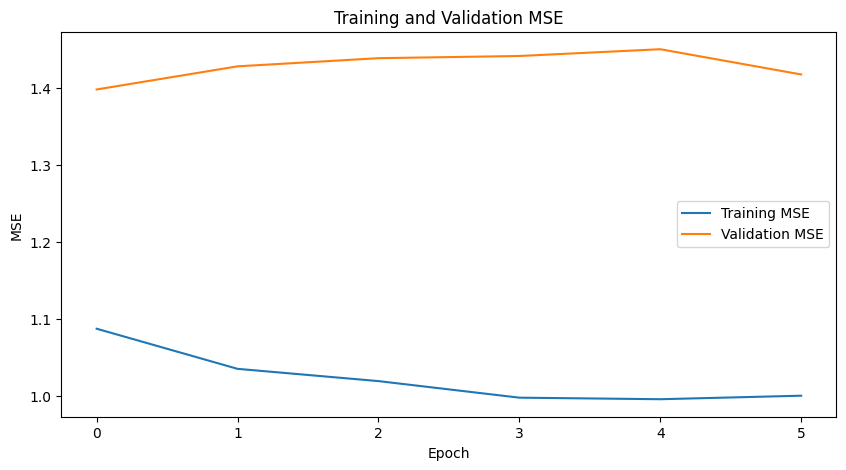

In [ ]:
history_plot(history)

175/175 [==============================] - 1s 2ms/step
Test MSE: 1.3984291553497314
Test Loss: 1.3984291553497314
Mean Absolute Error: 0.9050473428785705
Root Mean Squared Error: 1.1825518764251755
R-squared Score: -0.04890679029916867
175/175 [==============================] - 0s 2ms/step


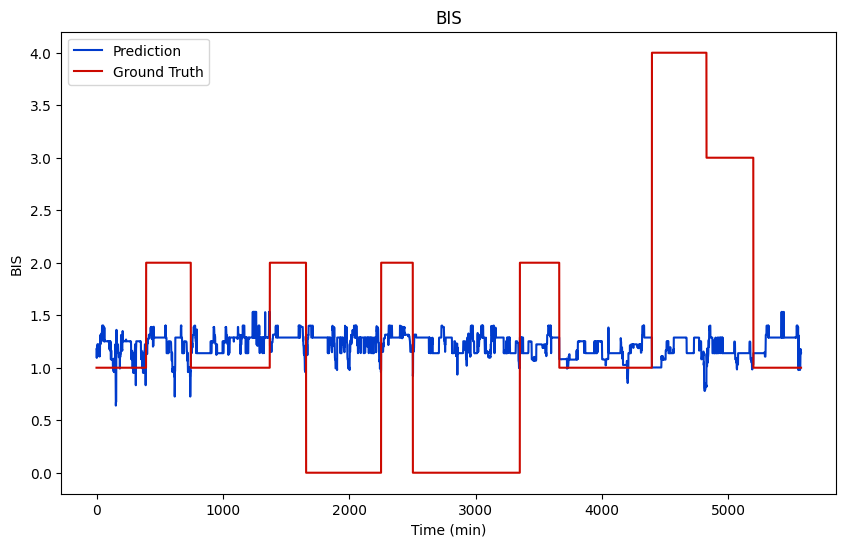

In [ ]:
eval(model_lstm_1,X_val,y_val)



pred = model_lstm_1.predict(X_val)
pred_vs_act(pred,y_val)

# Prototype Model _2
Add dropout regularization

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X and y are defined and split into training and validation sets

# Define the LSTM model
model_lstm_2 = Sequential()
model_lstm_2.add(LSTM(100, return_sequences=True, input_shape=(n_timesteps, n_features)))  # 100 LSTM units
model_lstm_2.add(Dropout(0.2))  # Add dropout regularization
model_lstm_2.add(LSTM(50))  # Add another LSTM layer with 50 units
model_lstm_2.add(Dense(1, activation='linear'))


model_lstm_2.compile(optimizer='adam', loss='mse', metrics=['mse'])


early_stopping = EarlyStopping(monitor='val_mse', patience=5, verbose=1, mode='min', restore_best_weights=True)
history = model_lstm_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=1, callbacks=[early_stopping])

Epoch 1/100
785/785 [==============================] - 13s 12ms/step - loss: 1.0530 - mse: 1.0530 - val_loss: 1.3916 - val_mse: 1.3916
Epoch 2/100
785/785 [==============================] - 7s 9ms/step - loss: 1.0138 - mse: 1.0138 - val_loss: 1.4001 - val_mse: 1.4001
Epoch 3/100
785/785 [==============================] - 9s 12ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.3832 - val_mse: 1.3832
Epoch 4/100
785/785 [==============================] - 8s 11ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.4218 - val_mse: 1.4218
Epoch 5/100
785/785 [==============================] - 8s 11ms/step - loss: 1.0057 - mse: 1.0057 - val_loss: 1.4098 - val_mse: 1.4098
Epoch 6/100
785/785 [==============================] - 7s 9ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.3866 - val_mse: 1.3866
Epoch 7/100
785/785 [==============================] - 9s 12ms/step - loss: 1.0167 - mse: 1.0167 - val_loss: 1.4337 - val_mse: 1.4337
Epoch 8/100
785/785 [==============================] - 9s 12ms/

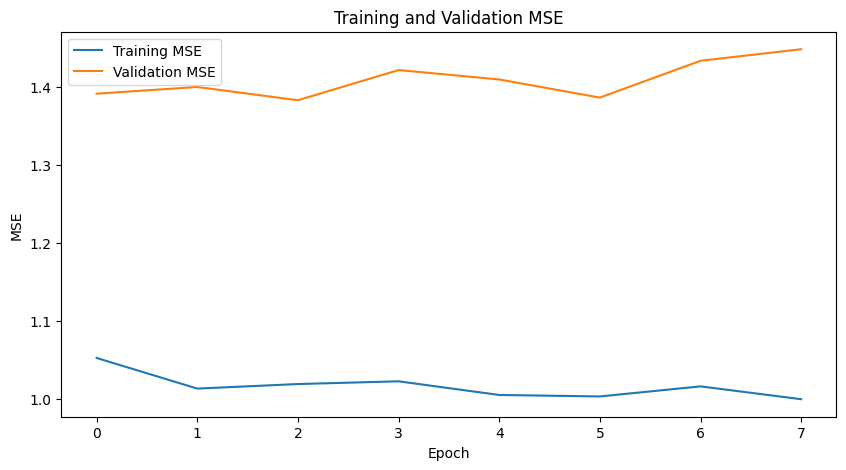

In [ ]:
history_plot(history)

175/175 [==============================] - 1s 3ms/step
Test MSE: 1.3831772804260254
Test Loss: 1.3831772804260254
Mean Absolute Error: 0.922426818615009
Root Mean Squared Error: 1.1760856362784806
R-squared Score: -0.037467224915115116
175/175 [==============================] - 1s 5ms/step


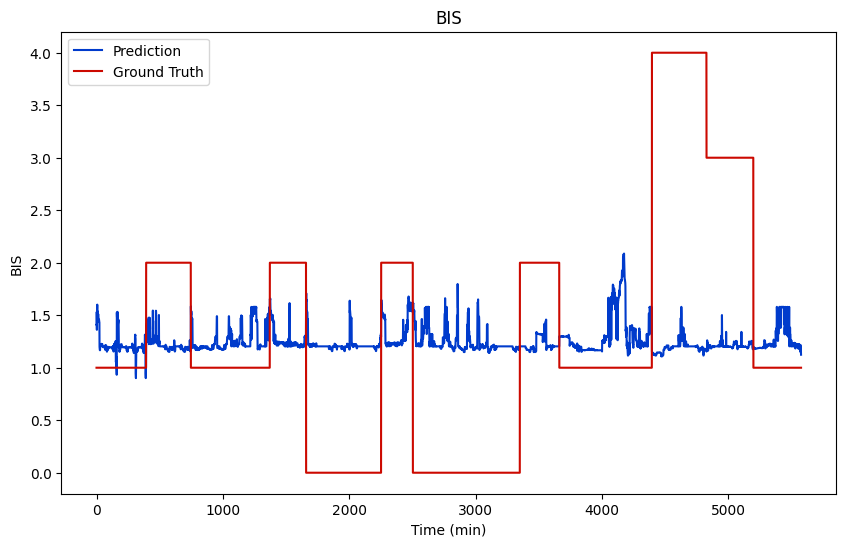

In [ ]:
eval(model_lstm_2,X_val,y_val)



pred = model_lstm_2.predict(X_val)
pred_vs_act(pred,y_val)

# ResNet model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping


def residual_block(x, filters, kernel_size, strides=1):
    y = Conv1D(filters, kernel_size, padding='same', strides=strides)(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv1D(filters, kernel_size, padding='same')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    if strides > 1:
        x = Conv1D(filters, 1, padding='same', strides=strides)(x)

    return Add()([x, y])

# Define the ResNet model
inputs = Input(shape=(n_timesteps, n_features))
x = Conv1D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

for _ in range(3):
    x = residual_block(x, 64, 3)

x = GlobalAveragePooling1D()(x)
outputs = (Dense(1, activation='linear'))(x)

model_resnet = Model(inputs, outputs)


model_resnet.compile(optimizer='adam', loss='mse', metrics=['mse'])

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_mse', patience=5, verbose=1, mode='min', restore_best_weights=True)
history = model_resnet.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=1, callbacks=[early_stopping])


Epoch 1/100
785/785 [==============================] - 11s 8ms/step - loss: 1.3711 - mse: 1.3711 - val_loss: 1.6254 - val_mse: 1.6254
Epoch 2/100
785/785 [==============================] - 5s 6ms/step - loss: 1.0611 - mse: 1.0611 - val_loss: 1.4580 - val_mse: 1.4580
Epoch 3/100
785/785 [==============================] - 7s 9ms/step - loss: 1.0291 - mse: 1.0291 - val_loss: 1.6347 - val_mse: 1.6347
Epoch 4/100
785/785 [==============================] - 5s 6ms/step - loss: 1.0037 - mse: 1.0037 - val_loss: 1.5167 - val_mse: 1.5167
Epoch 5/100
785/785 [==============================] - 5s 6ms/step - loss: 1.0314 - mse: 1.0314 - val_loss: 1.5478 - val_mse: 1.5478
Epoch 6/100
785/785 [==============================] - 6s 8ms/step - loss: 0.9820 - mse: 0.9820 - val_loss: 2.3809 - val_mse: 2.3809
Epoch 7/100
785/785 [==============================] - 5s 6ms/step - loss: 0.9674 - mse: 0.9674 - val_loss: 1.9822 - val_mse: 1.9822
Epoch 7: early stopping


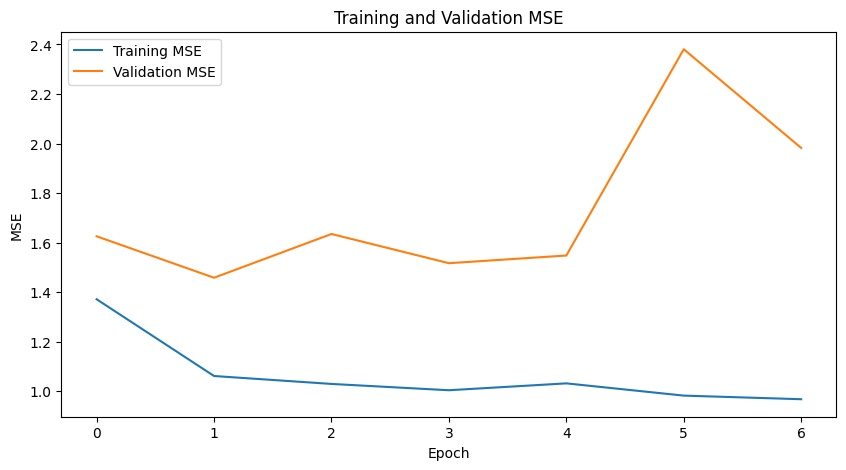

In [ ]:
history_plot(history)

175/175 [==============================] - 1s 3ms/step
Test MSE: 1.4580155611038208
Test Loss: 1.4580155611038208
Mean Absolute Error: 0.9774045872072689
Root Mean Squared Error: 1.2074832278467333
R-squared Score: -0.09360051957532134
175/175 [==============================] - 1s 3ms/step


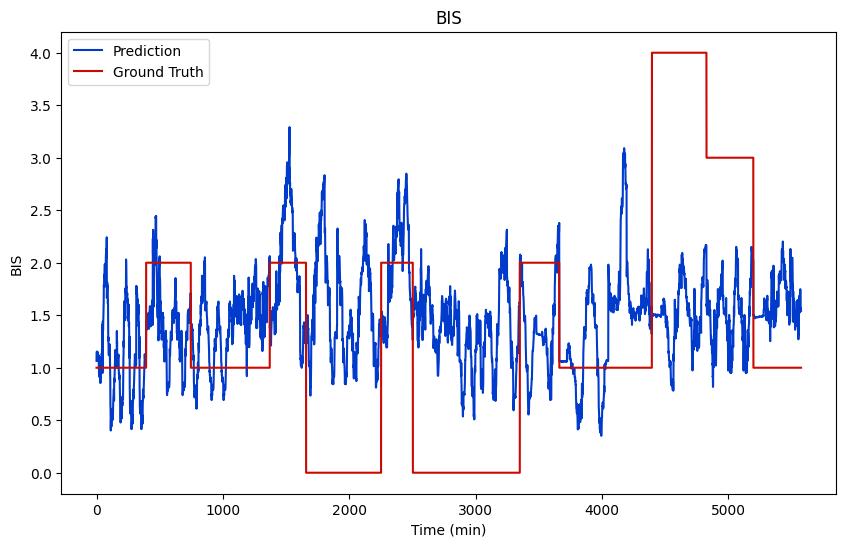

In [ ]:
eval(model_resnet,X_val,y_val)



pred = model_resnet.predict(X_val)
pred_vs_act(pred,y_val)